# Import Libraries

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Import Dataset

In [12]:
data = pd.read_csv("../dataset/bitcoin_price.csv", index_col="Date", parse_dates=True)
data.index

DatetimeIndex(['2014-09-17', '2014-09-18', '2014-09-19', '2014-09-20',
               '2014-09-21', '2014-09-22', '2014-09-23', '2014-09-24',
               '2014-09-25', '2014-09-26',
               ...
               '2023-12-21', '2023-12-22', '2023-12-23', '2023-12-24',
               '2023-12-25', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2023-12-30'],
              dtype='datetime64[ns]', name='Date', length=3392, freq=None)

In [ ]:
data.info()

In [ ]:
# Setting the frequency
data = data.asfreq('D')

In [ ]:
# Change the time series variable name
data = data.rename(columns={'revenue': 'y'})

# Exploratory Data Analysis (EDA)

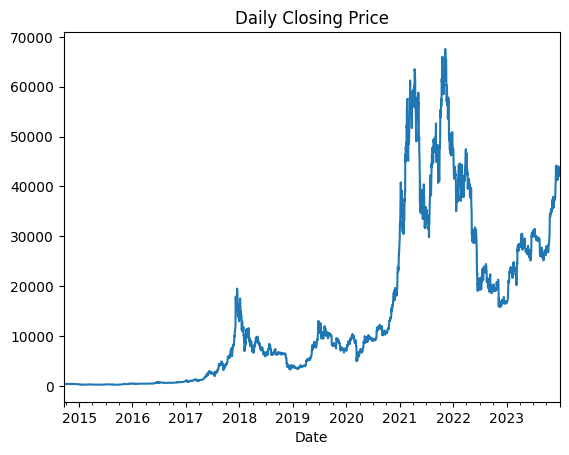

In [13]:
# Daily Closing Price Plot
data['Close'].plot(title='Daily Closing Price')
plt.show()

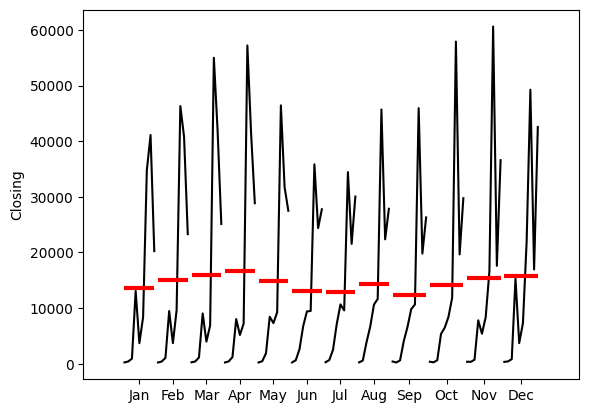

In [14]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(data['Close'].resample('ME').mean(), ylabel='Closing')
plt.show()

/var/folders/9_/fy5p9d_52f9d3dxp8df05zlc0000gn/T/ipykernel_15299/12761308.py:3: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(data['Close'].resample('Q').mean(), ylabel='Closing')


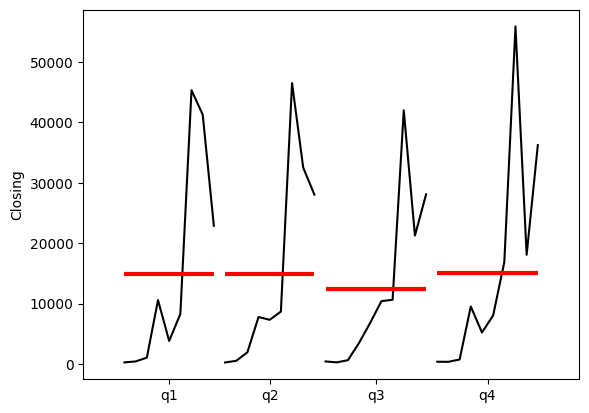

In [15]:
from statsmodels.graphics.tsaplots import quarter_plot

quarter_plot(data['Close'].resample('Q').mean(), ylabel='Closing')
plt.show()

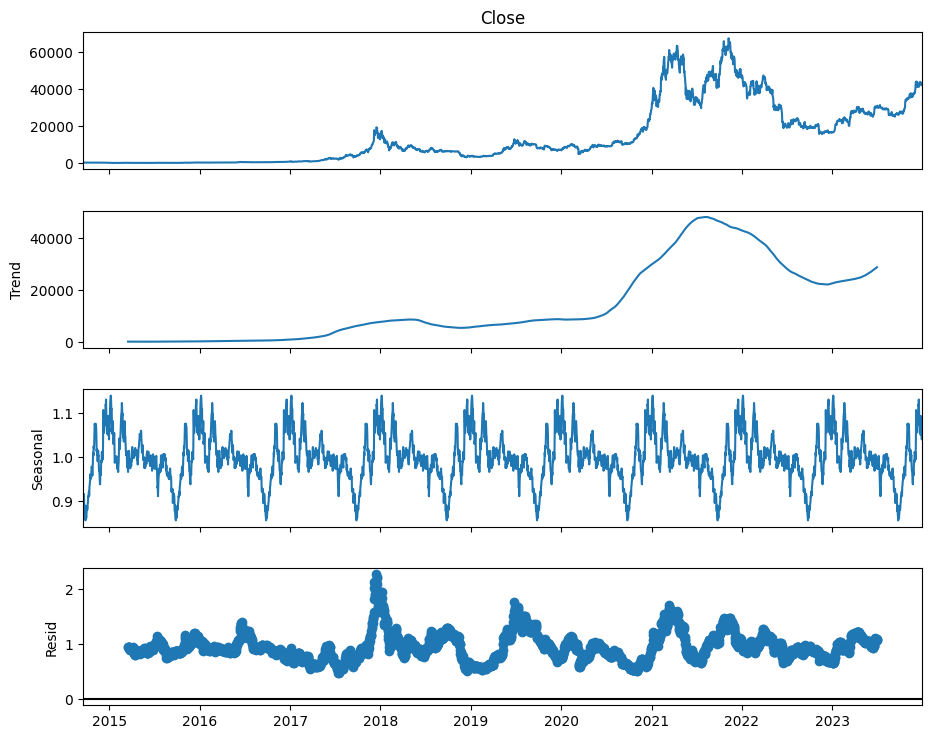

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal Decomposition Plots for Bitcoin Data
decomposition = seasonal_decompose(data['Close'], model='multiplicative', period=365)

fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.show()

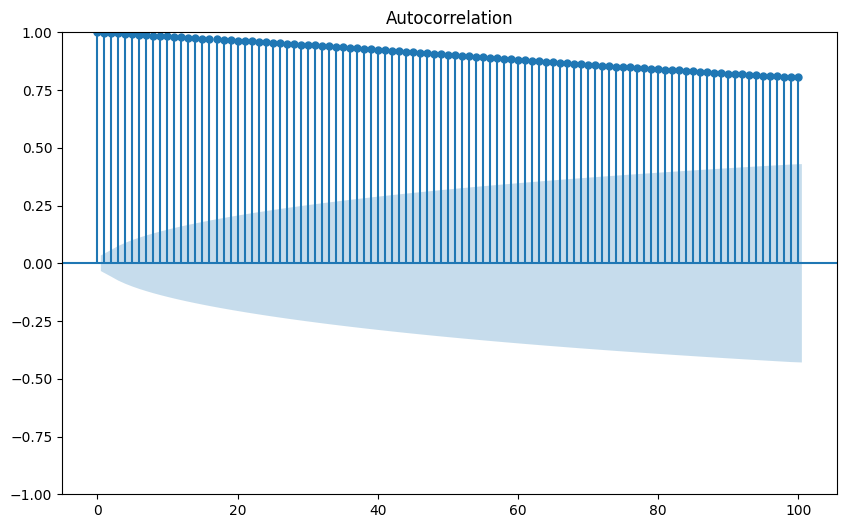

In [17]:
from statsmodels.graphics.tsaplots import plot_acf

# Python Auto Correlation
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(data['Close'], lags=100, ax=ax)
plt.show()

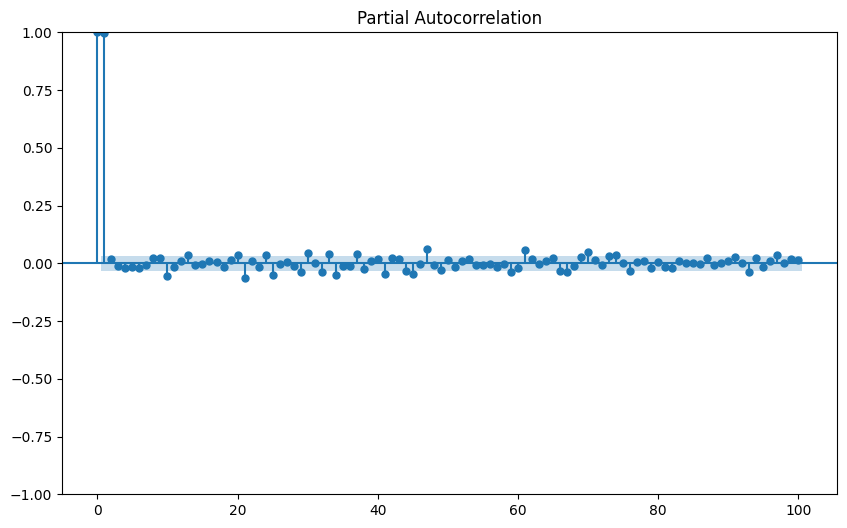

In [18]:
from statsmodels.graphics.tsaplots import plot_pacf

# Python Partial Auto Correlation
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(data['Close'], lags=100, ax=ax)
plt.show()

## Model Assessment

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, root_mean_squared_error

# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
    # Plot training, test, and forecasts
    plt.figure(figsize=(10, 4))
    plt.plot(train, label='Train')
    plt.plot(test, label='Test')
    plt.plot(predictions, label='Forecast')
    plt.title(f"Train, Test, and Predictions with {chart_title}")
    plt.legend()
    plt.show()

    # Calculating MAE, MSE, MAPE, RMSE
    mae = mean_absolute_error(test, predictions)
    mape = mean_absolute_percentage_error(test, predictions)
    mse = mean_squared_error(test, predictions)
    rmse = root_mean_squared_error(test, predictions)

    print(f'Mean Absolute Error              : {mae}')
    print(f'Mean Absolute Percentage Error   : {mape * 100:.2f}')
    print(f'Mean Squared Error               : {mse}')
    print(f'Root Mean Squared Error          : {rmse}')

model_assessment(train, test, predictions_simple, 'Simple Exp Smoothing')
# model_assessment(train, test, predictions_double, 'Double Exp Smoothing')
# model_assessment(train, test, predictions_triple, 'Holt-Winters')
# model_assessment(train['2022-06':], test, predictions_triple, 'Holt-Winters')

NameError: name 'train' is not defined

## Predicting the Future

In [20]:
# Function to plot the future
def plot_future(y, forecast, title):
    # Plot training, test, and forecasts
    plt.figure(figsize=(10, 4))
    plt.plot(y, label='Train')
    plt.plot(forecast, label='Forecast')
    plt.title(f"Train, Test, and Predictions with {title}")
    plt.legend()
    plt.show()